In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import re

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.21.2 scipy==1.7.1 pandas==1.3.2 scikit-learn==0.24.2 statsmodels==0.12.2 pynndescent==0.5.4


In [3]:
samples = pd.read_csv("./sample_data.csv")
samples

,Unnamed: 0,sample,Genes_per_cell,Counts_per_cell,alignment_eff,Sample_Name,Sample_Plate,Sample_Well,Cell.Count
0,1,A10_S169_quant,11,11.000,0.392857,A10,BT474_SETB,G01,2
1,2,A10_S265_quant,7271,268773.961,0.111918,A10,CHO,G01,1
2,3,A10_S73_quant,23,24.000,0.307692,A10,MCF7,G01,1
3,4,A11_S177_quant,12130,2209382.972,0.901840,A11,BT474_SETB,G09,1
4,5,A11_S273_quant,6673,282441.989,0.110731,A11,CHO,G09,1
...,...,...,...,...,...,...,...,...,...
283,284,H8_S256_quant,6935,333538.964,0.123523,H8,CHO,F04,NTC
284,285,H8_S64_quant,10608,968919.994,0.887536,H8,MCF7,F04,NTC
285,286,H9_S168_quant,11396,1541125.942,0.906062,H9,BT474_SETB,F12,NTC
286,287,H9_S264_quant,19,19.000,0.152000,H9,CHO,F12,NTC


In [4]:
cell_d = dict(zip(samples["sample"], samples["Sample_Plate"]))
cell_d

{'A10_S169_quant': 'BT474_SETB',
 'A10_S265_quant': 'CHO',
 'A10_S73_quant': 'MCF7',
 'A11_S177_quant': 'BT474_SETB',
 'A11_S273_quant': 'CHO',
 'A11_S81_quant': 'MCF7',
 'A12_S185_quant': 'BT474_SETB',
 'A12_S281_quant': 'CHO',
 'A12_S89_quant': 'MCF7',
 'A1_S193_quant': 'CHO',
 'A1_S1_quant': 'MCF7',
 'A1_S97_quant': 'BT474_SETB',
 'A2_S105_quant': 'BT474_SETB',
 'A2_S201_quant': 'CHO',
 'A2_S9_quant': 'MCF7',
 'A3_S113_quant': 'BT474_SETB',
 'A3_S17_quant': 'MCF7',
 'A3_S209_quant': 'CHO',
 'A4_S121_quant': 'BT474_SETB',
 'A4_S217_quant': 'CHO',
 'A4_S25_quant': 'MCF7',
 'A5_S129_quant': 'BT474_SETB',
 'A5_S225_quant': 'CHO',
 'A5_S33_quant': 'MCF7',
 'A6_S137_quant': 'BT474_SETB',
 'A6_S233_quant': 'CHO',
 'A6_S41_quant': 'MCF7',
 'A7_S145_quant': 'BT474_SETB',
 'A7_S241_quant': 'CHO',
 'A7_S49_quant': 'MCF7',
 'A8_S153_quant': 'BT474_SETB',
 'A8_S249_quant': 'CHO',
 'A8_S57_quant': 'MCF7',
 'A9_S161_quant': 'BT474_SETB',
 'A9_S257_quant': 'CHO',
 'A9_S65_quant': 'MCF7',
 'B10_S170

In [5]:
#ext = sc.read_csv("./GSE134038_MCF7_extern.csv", delimiter=",")
#ext.obs["id"] = "MCF7-extern"
#ext.obs

,id
X1_A10_Hypo_S28,MCF7-extern
X1_A11_Hypo_S29,MCF7-extern
X1_A12_Hypo_S30,MCF7-extern
X1_A1_Norm_S1,MCF7-extern
X1_A2_Norm_S2,MCF7-extern
...,...
X4_H6_Norm_S360,MCF7-extern
X4_H7_Hypo_S379,MCF7-extern
X4_H8_Hypo_S380,MCF7-extern
X4_H9_Hypo_S381,MCF7-extern


In [6]:
#v = ["_Norm_" in s for s in ext.obs_names]
#ext = ext[v]
#ext.obs

,id
X1_A1_Norm_S1,MCF7-extern
X1_A2_Norm_S2,MCF7-extern
X1_A3_Norm_S3,MCF7-extern
X1_A4_Norm_S4,MCF7-extern
X1_A5_Norm_S5,MCF7-extern
...,...
X4_H2_Norm_S356,MCF7-extern
X4_H3_Norm_S357,MCF7-extern
X4_H4_Norm_S358,MCF7-extern
X4_H5_Norm_S359,MCF7-extern


In [289]:
ext = sc.read_csv("./GSE151334_MCF7_extern_ensembl.csv", delimiter=",")
ext.obs

""
Fibroblasts_A10_S10
Fibroblasts_A11_S11
Fibroblasts_A2_S2
Fibroblasts_A3_S3
Fibroblasts_A4_S4
...
MCF7_O5_S341
MCF7_O9_S345
MCF7_P17_S377
MCF7_P3_S363


In [290]:
np.unique([re.match("(.*?)_", cell).group(1) for cell in ext.obs_names])

array(['Fibroblasts', 'HEK293T', 'MCF7'], dtype='<U11')

In [292]:
ext.obs["id"] = [re.match("(.*?)_", cell).group(1) + "-extern" for cell in ext_hek.obs_names]
ext.obs

,id
Fibroblasts_A10_S10,Fibroblasts-extern
Fibroblasts_A11_S11,Fibroblasts-extern
Fibroblasts_A2_S2,Fibroblasts-extern
Fibroblasts_A3_S3,Fibroblasts-extern
Fibroblasts_A4_S4,Fibroblasts-extern
...,...
MCF7_O5_S341,MCF7-extern
MCF7_O9_S345,MCF7-extern
MCF7_P17_S377,MCF7-extern
MCF7_P3_S363,MCF7-extern


In [129]:
#v = ["HEK" in s for s in ext_hek.obs_names]
#ext_hek = ext_hek[v]
#ext_hek.obs["id"] = "HEK293"
#ext_hek.obs

Trying to set attribute `.obs` of view, copying.


,id
HEK293T_A10_S10,HEK293
HEK293T_A12_S12,HEK293
HEK293T_A15_S15,HEK293
HEK293T_A16_S16,HEK293
HEK293T_A17_S17,HEK293
...,...
HEK293T_E6_S102,HEK293
HEK293T_E7_S103,HEK293
HEK293T_E8_S104,HEK293
HEK293T_F10_S130,HEK293


In [293]:
emu = sc.read_csv("./raw_cnts_EMU.csv", delimiter=",")
emu.obs

""
A11_S177_quant
A11_S81_quant
A12_S185_quant
A2_S105_quant
A2_S9_quant
...
H7_S152_quant
H7_S56_quant
H8_S64_quant
H9_S168_quant


In [294]:
emu.obs["id"] = [cell_d[c] for c in emu.obs_names]
emu.obs

,id
A11_S177_quant,BT474_SETB
A11_S81_quant,MCF7
A12_S185_quant,BT474_SETB
A2_S105_quant,BT474_SETB
A2_S9_quant,MCF7
...,...
H7_S152_quant,BT474_SETB
H7_S56_quant,MCF7
H8_S64_quant,MCF7
H9_S168_quant,BT474_SETB


In [310]:
data = emu.concatenate(ext, join="inner")
#data = emu.concatenate(ext_hek, join="inner")
data

AnnData object with n_obs × n_vars = 763 × 23896
    obs: 'id', 'batch'

In [311]:
data.obs

,id,batch
A11_S177_quant-0,BT474_SETB,0
A11_S81_quant-0,MCF7,0
A12_S185_quant-0,BT474_SETB,0
A2_S105_quant-0,BT474_SETB,0
A2_S9_quant-0,MCF7,0
...,...,...
MCF7_O5_S341-1,MCF7-extern,1
MCF7_O9_S345-1,MCF7-extern,1
MCF7_P17_S377-1,MCF7-extern,1
MCF7_P3_S363-1,MCF7-extern,1


In [312]:
data.var

""
ENSG00000000003
ENSG00000000005
ENSG00000000419
ENSG00000000457
ENSG00000000460
...
ENSG00000286098
ENSG00000286105
ENSG00000286139
ENSG00000287542


In [313]:
data.var_names_make_unique() 

In [314]:
sc.pp.filter_cells(data, min_genes=200)
sc.pp.filter_genes(data, min_cells=3)

filtered out 3969 genes that are detected in less than 3 cells


In [315]:
sc.pp.normalize_total(data, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [316]:
sc.pp.log1p(data)

In [317]:
#sc.pp.highly_variable_genes(data, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [318]:
#data.raw = data
#data = data[:, data.var.highly_variable]

In [319]:
sc.pp.scale(data, max_value=10)

In [320]:
sc.tl.pca(data, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:03)


In [321]:
#sc.pl.pca(data, color='id')

In [322]:
sc.external.pp.bbknn(data, batch_key='batch') 
#sc.pp.neighbors(data)

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [323]:
sc.tl.umap(data)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


/home/sailor/anaconda3/envs/EMUscRNA/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'id' as categorical


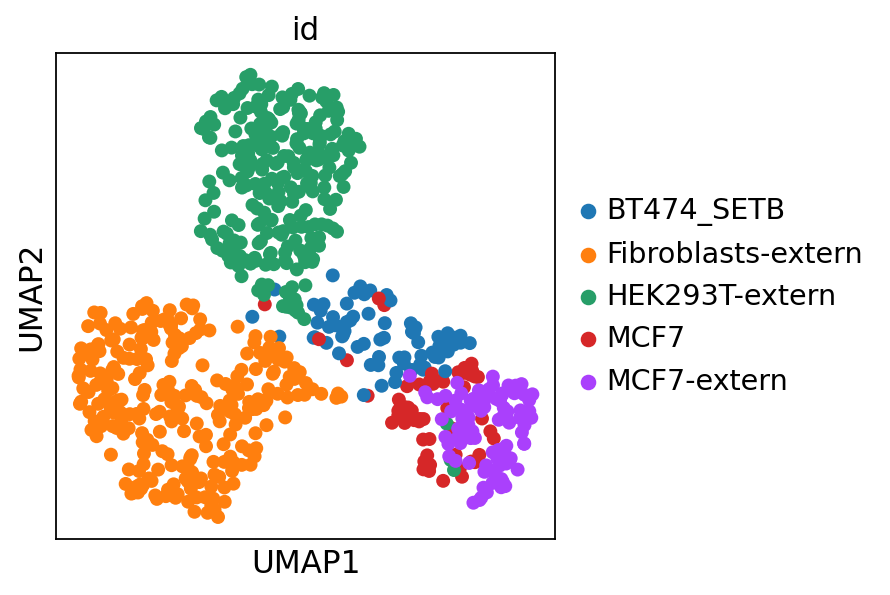

In [324]:
sc.pl.umap(data, color=['id'])